In [9]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import LinearLocator

### Q3.1

In [10]:
class neural_network_bump1:
    def __init__(self, W1, b1, W2, b2):
        self.W1 = W1
        self.b1 = b1
        self.W2 = W2
        self.b2 = b2

    def sigmoid(self, X):
        """X: array"""
        return 1/(1 + np.exp(-X))

    def _linear(self, X, W, b):
        """
        X, W, b: array
        """
        return np.dot(X, W.T) + b

    def forward(self, X):
        """
        X: array
        return: array
        """
        out = self.sigmoid(self._linear(X, self.W1, self.b1))
        out = self._linear(out, self.W2, self.b2)
        return out
    


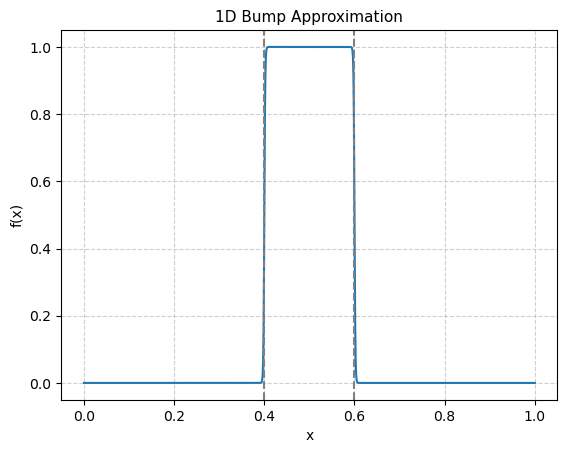

In [11]:
X = np.array([np.linspace(0, 1, 1000)]).T
W1 = np.array([[1000], 
               [-1000]])
b1 = np.array([-400,600])   ## 0.4, 0.6
W2 = np.array([1,1])  ## height
b2 = np.array([-1])

model = neural_network_bump1(W1, b1, W2, b2)
y_pred = model.forward(X)

plt.plot(X, y_pred)
plt.axvline(x=0.4, color='grey', linestyle='--')
plt.axvline(x=0.6, color='grey', linestyle='--')
plt.xlabel('x', fontsize = 10)
plt.ylabel('f(x)', fontsize = 10)
plt.title('1D Bump Approximation', fontsize = 11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Q3.2a

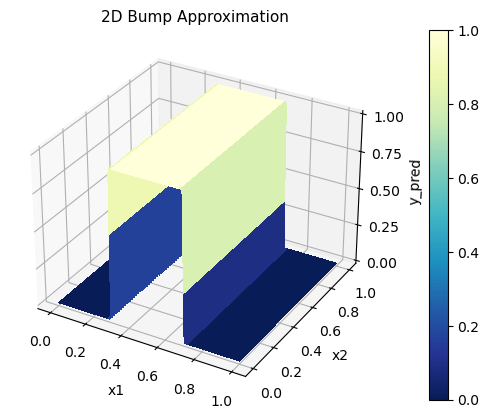

In [12]:
W1 = np.array([[1000,0], 
               [-1000,0]])   ## 0 makes x2 insignificant to y_pred
b1 = np.array([-300,700])   ## 0.4, 0.6
W2 = np.array([1,1])  ## height
b2 = np.array([-1])

x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)
model = neural_network_bump1(W1, b1, W2, b2)
Z = model.forward(np.column_stack((X.flatten(), Y.flatten()))).reshape(1000, 1000)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r,
                       linewidth=0, antialiased=False)

ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y_pred')
plt.title('2D Bump Approximation', fontsize = 11)
fig.colorbar(surf, aspect=20, pad=0.1)

plt.show()


### Q3.2b

In [13]:
class neural_network_bump2:
    def __init__(self, W1, b1, W2, b2, W3, b3):
        self.W1 = W1
        self.b1 = b1
        self.W2 = W2
        self.b2 = b2
        self.W3 = W3
        self.b3 = b3

    def sigmoid(self, X):
        """X: array"""
        return 1/(1 + np.exp(-X))

    def _linear(self, X, W, b):
        """
        X, W, b: array
        """
        try:
            return np.dot(X, W.T) + b
        except Exception:
            print('Int as weight matrix')
            return np.dot(X, W) + b

    def forward(self, X):
        """
        X: array
        return: array
        """
        out = self.sigmoid(self._linear(X, self.W1, self.b1))
        out = self.sigmoid(self._linear(out, self.W2, self.b2))
        out = self._linear(out, self.W3, self.b3)
        return out

/var/folders/k8/203mhpwn7gs4sfy9lhld1jn00000gn/T/ipykernel_2470/1084203326.py:12: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-X))


Int as weight matrix


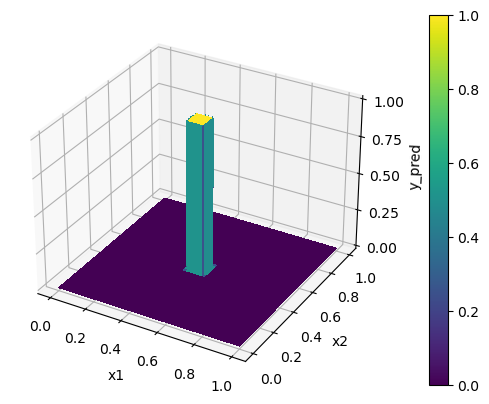

In [14]:
W1 = np.array([[1000,0], 
               [-1000,0],
               [0,1000],
               [0,-1000]])
b1 = np.array([-450,550,-450,550]) 
W2 = np.array([500,500,500,500])  
b2 = np.array([-1750])    ## abs = (3*w2, 4*w2) -- 3.5*w2
W3 = 1 ## height
b3 = np.array([0])

x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)
model = neural_network_bump2(W1, b1, W2, b2, W3, b3)
Z = model.forward(np.column_stack((X.flatten(), Y.flatten()))).reshape(1000, 1000)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap='viridis',
                       linewidth=0, antialiased=False)

ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y_pred')
fig.colorbar(surf, aspect=20, pad=0.1)

plt.show()
